In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [148]:
# READ IN NAMES, REDDENINGS, AND MAGNITUDES OF NGVS GALAXIES

filePath = 'finalCat_fixColNames.txt'

columns = [0, 31, 37, 93, 149, 205, 261, 359, 390, 421, 452, 483]
dtypes = 'S27, f, f, f, f, f, f, f, f, f, f, f'

#data = np.genfromtxt(filePath, dtype = dtypes, skip_header = 1, usecols = columns)
data = np.genfromtxt(filePath, dtype = dtypes, skip_header = 0, usecols = columns, names = True)

#df = pd.read_csv(filePath)

In [149]:
# DECLARE COEFFICIENTS OF EXTINCTION FOR EACH BAND

extCoeff = np.array([4.594, 3.560, 2.464, 1.813, 1.221])

In [150]:
# GENERATE ABSOLUTE MAGNITUDES FOR NGVS GALAXIES, USING COG VALUES IF POSSIBLE (GALFIT OTHERWISE)

# create empty arrays to hold data of interest
ngvsID = []
#ngvsID = np.empty(data.shape[0], dtype = 'S27')
ebv = np.empty(data.shape[0], dtype = float)
absMags = np.empty((data.shape[0], 5), dtype = float)

# cycle through list of galaxies, creating absolute magnitudes using best available values
for i in range(data.shape[0]):
    ngvsID.append(data['Official_name'][i].decode('UTF-8'))
    #ngvsID[i] = data['Official_name'][i].decode('UTF-8')
    ebv[i] = data['eBV'][i]
    
    if data['g_mag_cg'][i] < 0.:
        magType = ['MAG_GALFIT_', '_gal']
    else:
        magType = ['', '_mag_cg']
        
    j = 0
    for band in 'ugriz':
        mag = data[magType[0] + band + magType[1]][i]
        if mag < 0. or mag > 40.:
            absMags[i, j] = -100.
        else:
            absMags[i, j] = mag - extCoeff[j] * ebv[i] - 31.09
        j += 1
        

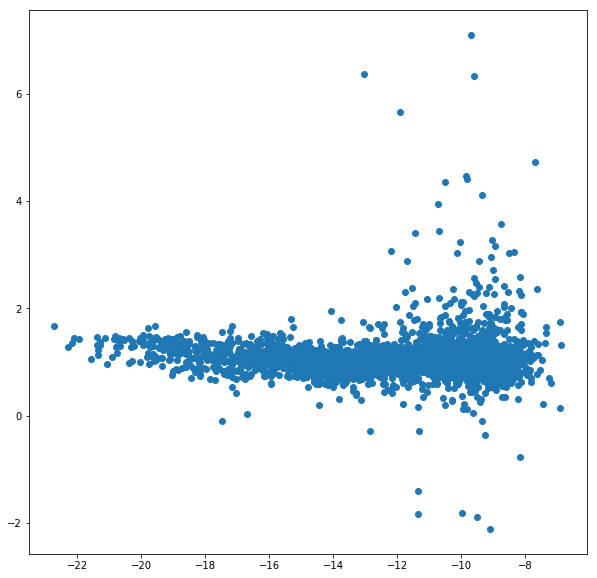

In [151]:
# PLOT COLOR-MAGNITUDE DIAGRAM OF GALAXIES, USING SPECIFIED MAGNITUDES

fig = plt.figure(figsize = (10, 10))
ax = plt.subplot(111)

xMag = 1
yMags = [0, 1]
mask = (absMags[:, xMag] != -100.) & (absMags[:, yMags[0]] != -100.) & (absMags[:, yMags[1]] != -100.)
plt.scatter(absMags[mask, xMag], absMags[mask, yMags[0]] - absMags[mask, yMags[1]]);

In [152]:
fmt = '%s %7.3f %10.3f %10.3f %10.3f %10.3f %10.3f'
for i in range(absMags.shape[0]):
    print (fmt % (ngvsID[i], ebv[i], absMags[i, 0], absMags[i, 1], absMags[i, 2], absMags[i, 3], absMags[i, 4]))

NGVSJ12:03:45.06+27:37:02.0   0.019    -13.655    -14.488    -14.847    -15.043    -15.107
NGVSJ12:04:51.83+26:59:33.1   0.026    -16.678    -17.557    -18.009    -18.216    -18.377
NGVSJ12:07:45.73+12:03:37.0   0.025     -9.400    -10.598   -100.000    -11.456    -11.416
NGVSJ12:08:01.21+12:48:56.0   0.027    -10.769    -11.738   -100.000    -12.392    -12.383
NGVSJ12:08:04.43+13:13:17.0   0.030     -9.713    -10.645   -100.000    -11.331    -11.447
NGVSJ12:08:05.48+12:45:50.3   0.027    -12.835    -13.929   -100.000    -14.668    -14.670
NGVSJ12:08:20.90+12:30:07.8   0.026    -12.378    -13.171   -100.000    -13.645    -13.678
NGVSJ12:08:21.35+12:15:47.1   0.026     -6.668     -8.569   -100.000     -8.980     -9.706
NGVSJ12:08:48.20+11:54:42.0   0.024    -10.003    -10.283   -100.000     -9.970     -9.121
NGVSJ12:09:15.68+12:09:50.5   0.027     -9.041    -10.039   -100.000    -10.643    -10.549
NGVSJ12:09:16.79+13:01:01.3   0.033    -11.661    -12.829   -100.000    -13.626    -13.719

NGVSJ12:23:45.17+14:27:47.6   0.036     -9.410    -10.386   -100.000    -11.089    -11.029
NGVSJ12:23:46.20+07:28:49.7   0.023     -8.442    -10.011   -100.000    -10.669    -10.275
NGVSJ12:23:46.25+16:47:27.0   0.026    -13.429    -14.502   -100.000    -15.253    -15.086
NGVSJ12:23:47.08+15:07:31.5   0.022    -13.124    -14.244   -100.000    -14.988    -15.190
NGVSJ12:23:47.33+13:36:08.3   0.047    -11.233    -12.647   -100.000    -13.502    -13.437
NGVSJ12:23:48.83+11:17:46.8   0.024     -9.941    -11.010   -100.000    -11.741    -11.755
NGVSJ12:23:49.06+15:14:39.9   0.026     -9.189    -10.311   -100.000    -11.104    -11.302
NGVSJ12:23:49.16+11:32:54.2   0.032    -10.578    -11.636   -100.000    -12.332    -12.551
NGVSJ12:23:49.52+13:34:43.9   0.049     -7.839     -8.867   -100.000     -9.719     -9.900
NGVSJ12:23:49.59+07:25:27.9   0.022     -9.612    -10.734   -100.000    -11.554    -11.330
NGVSJ12:23:49.93+06:03:35.2   0.024    -13.696    -14.854   -100.000    -15.683    -15.835

NGVSJ12:36:51.30+12:22:07.9   0.045    -13.057    -14.164   -100.000    -14.856    -14.933
NGVSJ12:36:51.54+11:40:26.3   0.036     -6.720     -9.121   -100.000     -9.995     -9.420
NGVSJ12:36:52.52+13:17:01.6   0.045    -11.053    -12.274   -100.000    -13.003    -12.751
NGVSJ12:36:52.57+13:46:03.6   0.045    -11.440    -12.564   -100.000    -13.336    -13.419
NGVSJ12:36:53.02+11:51:46.6   0.043     -6.930     -8.121   -100.000     -8.663     -8.669
NGVSJ12:36:54.58+11:50:39.8   0.043     -9.481    -10.397   -100.000    -11.145    -10.952
NGVSJ12:36:56.53+15:45:03.9   0.045     -9.689    -10.585   -100.000    -11.056    -10.898
NGVSJ12:36:56.80+16:32:37.2   0.026    -10.452    -11.497   -100.000    -12.178    -12.140
NGVSJ12:36:56.99+13:28:11.1   0.049     -5.808     -7.345   -100.000     -7.855     -7.464
NGVSJ12:36:58.39+12:25:15.3   0.044     -7.359     -8.401   -100.000     -8.967     -9.061
NGVSJ12:36:59.28+07:52:22.5   0.023    -11.866    -12.898   -100.000    -13.599    -13.843

In [158]:
fluxes = 10. ** (23. - (absMags + 48.6) / 2.5)
fluxes[absMags == -100.] = -100.
fluxErrs = 0.1 * fluxes

fmt = '%s %5.1f %12.3e %12.3e %12.3e %12.3e %12.3e %12.3e %12.3e %12.3e %12.3e %12.3e'
for i in range(fluxes.shape[0]):
    print (fmt % (ngvsID[i], 0.0, fluxes[i, 0], fluxErrs[i, 0], fluxes[i, 1], fluxErrs[i, 1], fluxes[i, 2], 
                  fluxErrs[i, 2], fluxes[i, 3], fluxErrs[i, 3], fluxes[i, 4], fluxErrs[i, 4]))
    

NGVSJ12:03:45.06+27:37:02.0   0.0    1.052e+09    1.052e+08    2.266e+09    2.266e+08    3.155e+09    3.155e+08    3.778e+09    3.778e+08    4.007e+09    4.007e+08
NGVSJ12:04:51.83+26:59:33.1   0.0    1.703e+10    1.703e+09    3.826e+10    3.826e+09    5.804e+10    5.804e+09    7.023e+10    7.023e+09    8.142e+10    8.142e+09
NGVSJ12:07:45.73+12:03:37.0   0.0    2.089e+07    2.089e+06    6.301e+07    6.301e+06   -1.000e+02   -1.000e+01    1.388e+08    1.388e+07    1.338e+08    1.338e+07
NGVSJ12:08:01.21+12:48:56.0   0.0    7.373e+07    7.373e+06    1.800e+08    1.800e+07   -1.000e+02   -1.000e+01    3.287e+08    3.287e+07    3.260e+08    3.260e+07
NGVSJ12:08:04.43+13:13:17.0   0.0    2.786e+07    2.786e+06    6.576e+07    6.576e+06   -1.000e+02   -1.000e+01    1.237e+08    1.237e+07    1.377e+08    1.377e+07
NGVSJ12:08:05.48+12:45:50.3   0.0    4.942e+08    4.942e+07    1.354e+09    1.354e+08   -1.000e+02   -1.000e+01    2.675e+09    2.675e+08    2.678e+09    2.678e+08
NGVSJ12:08:20.90

NGVSJ12:22:41.27+15:47:44.2   0.0    4.841e+07    4.841e+06    1.288e+08    1.288e+07   -1.000e+02   -1.000e+01    2.318e+08    2.318e+07    2.789e+08    2.789e+07
NGVSJ12:22:41.87+13:13:19.2   0.0    1.058e+07    1.058e+06    2.243e+07    2.243e+06   -1.000e+02   -1.000e+01    5.168e+07    5.168e+06    2.295e+07    2.295e+06
NGVSJ12:22:41.99+08:49:59.1   0.0    5.930e+08    5.930e+07    1.460e+09    1.460e+08   -1.000e+02   -1.000e+01    2.748e+09    2.748e+08    2.988e+09    2.988e+08
NGVSJ12:22:42.56+07:30:51.4   0.0    8.255e+06    8.255e+05    3.388e+07    3.388e+06   -1.000e+02   -1.000e+01    5.517e+07    5.517e+06    5.508e+07    5.508e+06
NGVSJ12:22:42.91+13:12:11.5   0.0    2.481e+07    2.481e+06    6.064e+07    6.064e+06   -1.000e+02   -1.000e+01    1.120e+08    1.120e+07    1.115e+08    1.115e+07
NGVSJ12:22:43.08+14:18:07.5   0.0    3.903e+07    3.903e+06    8.148e+07    8.148e+06   -1.000e+02   -1.000e+01    1.523e+08    1.523e+07    1.617e+08    1.617e+07
NGVSJ12:22:43.34

NGVSJ12:41:18.14+13:09:56.9   0.0    3.453e+08    3.453e+07    9.863e+08    9.863e+07   -1.000e+02   -1.000e+01    1.824e+09    1.824e+08    2.042e+09    2.042e+08
NGVSJ12:41:19.45+06:31:24.7   0.0    1.188e+09    1.188e+08    2.129e+09    2.129e+08   -1.000e+02   -1.000e+01    2.817e+09    2.817e+08    2.956e+09    2.956e+08
NGVSJ12:41:23.13+09:43:12.7   0.0    1.980e+06    1.980e+05    6.828e+06    6.828e+05   -1.000e+02   -1.000e+01    8.522e+06    8.522e+05    1.425e+07    1.425e+06
NGVSJ12:41:23.40+12:24:12.0   0.0    1.049e+07    1.049e+06    2.813e+07    2.813e+06   -1.000e+02   -1.000e+01    5.992e+07    5.992e+06    5.737e+07    5.737e+06
NGVSJ12:41:23.94+08:21:57.2   0.0    2.998e+08    2.998e+07    8.110e+08    8.110e+07   -1.000e+02   -1.000e+01    1.618e+09    1.618e+08    1.808e+09    1.808e+08
NGVSJ12:41:24.74+13:05:17.2   0.0    9.908e+06    9.908e+05    3.432e+07    3.432e+06   -1.000e+02   -1.000e+01    6.497e+07    6.497e+06    6.280e+07    6.280e+06
NGVSJ12:41:28.07